In [29]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization library
%matplotlib inline
import seaborn as sns # interactive visualization library built on top on matplotlib

In [30]:
# load Data
df1 = pd.read_csv('train.csv')

In [31]:
# data at a glance
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [32]:
print(len(df1[df1.label == 0]), 'Non-Hatred Tweets')
print(len(df1[df1.label == 1]), 'Hatred Tweets')
# Class distribution in this data seems to be imbalanced.
# F1 score should be used fot model performance evaluation in such situation. 

29720 Non-Hatred Tweets
2242 Hatred Tweets


In [33]:
#importing different libraries for analysis, processing and classification
import nltk
from sklearn import re #regular expression for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word stemmer class
lemma = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist 
# vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #classification model
from sklearn.metrics import confusion_matrix, classification_report, f1_score # performance evaluation criteria

# Cleaning the word text in the tweets for a more clear analysis

In [34]:
def normalizer(tweet):
    tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [35]:
df1['normalized_text'] = df1.tweet.apply(normalizer)

Extracting Hashtags for further analysis

In [36]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z]',' ',  tweets)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [37]:
df1['hashtag'] = df1.tweet.apply(extract_hashtag)

In [38]:
df1.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


Now we will create word clods for the hatred, non hatred & all tweets

In [39]:
# all tweets 
all_words = " ".join(df1.normalized_text)
#print(all_all_words)

In [40]:
#Hatred tweets
hatred_words = " ".join(df1[df1['label']==1].normalized_text)
#print(hatred_words)

All Tweets cloudword

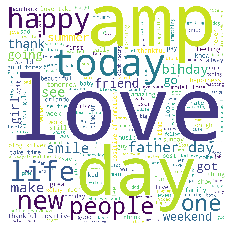

In [41]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(all_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Hatred Tweets Cloudword

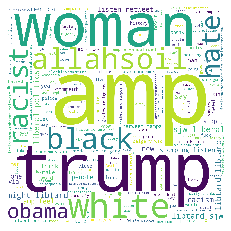

In [42]:
wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
wordcloud = wordcloud.generate(hatred_words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Analyzing Hashtags and plotting them according to hatred/non hatred

In [16]:
freq_all_hashtag = FreqDist(list((" ".join(df1.hashtag)).split())).most_common(10)
freq_all_hashtag

[('love', 1591),
 ('positive', 879),
 ('smile', 577),
 ('healthy', 576),
 ('thankful', 471),
 ('fun', 463),
 ('life', 438),
 ('summer', 392),
 ('model', 366),
 ('cute', 364)]

In [17]:
freq_hatred_hashtag = FreqDist(list((" ".join(df1[df1['label']==1]['hashtag'])).split())).most_common(10)
freq_hatred_hashtag

[('trump', 134),
 ('politics', 95),
 ('allahsoil', 92),
 ('libtard', 76),
 ('liberal', 75),
 ('sjw', 74),
 ('retweet', 63),
 ('miami', 46),
 ('black', 44),
 ('hate', 32)]

In [18]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
df_hatredhashtag = pd.DataFrame(freq_hatred_hashtag, columns=['words', 'frequency'])
print(df_allhashtag.head())
print(df_allhashtag.head())

      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471
      words  frequency
0      love       1591
1  positive        879
2     smile        577
3   healthy        576
4  thankful        471


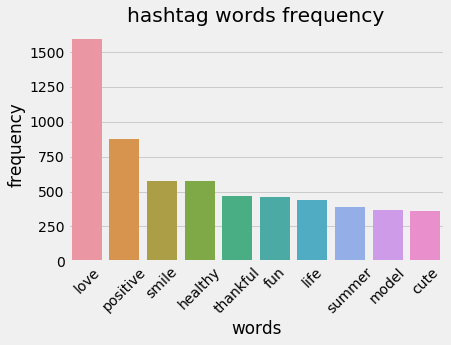

In [19]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('hashtag words frequency')
plt.show()

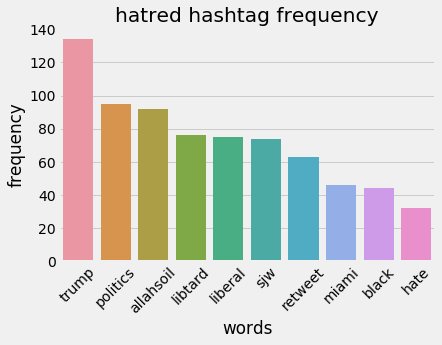

In [20]:
sns.barplot(x='words', y='frequency', data=df_hatredhashtag)
plt.xticks(rotation = 45)
plt.title('hatred hashtag frequency')
plt.show()

In [43]:
# to create sparse matrix corpus is created to pass to vectorizer
len(df1)
corpus = []
for i in range(0,31962):
    corpus.append(df1['normalized_text'][i])
#corpus

In [44]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
cv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [45]:
# creating dense matrix
X = cv.transform(corpus).toarray()
y = df1.iloc[:,1].values

In [46]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Classification Model: Logistic Regression

In [48]:
classifier1 = LogisticRegression(C=10)
classifier1.fit(X_train, y_train)

/Users/aayushsethi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
y_pred = classifier1.predict(X_test)
y_prob = classifier1.predict_proba(X_test)

In [51]:
print(f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6702702702702703
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9806
           1       0.78      0.58      0.67       742

    accuracy                           0.96     10548
   macro avg       0.88      0.79      0.82     10548
weighted avg       0.96      0.96      0.96     10548

[[9687  119]
 [ 308  434]]


In [52]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=42)
classifier2 = LogisticRegression(C=10)
classifier2.fit(X1_train, y1_train)

/Users/aayushsethi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
y1_pred = classifier2.predict(X1_test)
y1_prob = classifier2.predict_proba(X1_test)

In [55]:
print(f1_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
print(confusion_matrix(y1_test, y1_pred))

0.6308943089430895
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      9806
           1       0.80      0.52      0.63       742

    accuracy                           0.96     10548
   macro avg       0.88      0.76      0.80     10548
weighted avg       0.95      0.96      0.95     10548

[[9706  100]
 [ 354  388]]


a maximum f1 score of 0.63 is achieved at threshold of 0.5 thus tweet with probability greater than or equal to 0.5 will be classified as hatred since class distribution is imabalance we cannot use accurace as model performance evaluation method.

In [56]:
threshold = np.arange(0.1,0.9,0.1)
score = [f1_score(y1_test, ((y1_prob[:,1] >= x).astype(int))) for x in threshold]

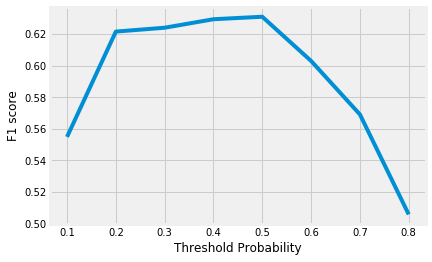

In [57]:
plt.plot(threshold, score)
plt.xlabel('Threshold Probability')
plt.ylabel('F1 score')
plt.show()

Running classification model on our test data set

In [58]:
df2 =pd.read_csv('test.csv')

In [59]:
df2.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [60]:
df2['normalized_text'] = df2['tweet'].apply(normalizer)

In [61]:
# creating corpus
corpus_test = []
for i in range(0,17197):
    corpus_test.append(df2.normalized_text[i])
#corpus_test

In [62]:
Test_X = tfidf.transform(corpus_test)

In [63]:
pred_Y = classifier2.predict(Test_X)
prob_Y = classifier2.predict_proba(Test_X)


In [64]:
df2['pred_label'] = pred_Y
scores = (prob_Y[:,1] >= 0.5).astype(int)
df2['score'] = scores

In [65]:
df2[df2.pred_label == 1]

,id,tweet,normalized_text,pred_label,score
19,31982,thought factory: bbc neutrality on right wing ...,thought factory bbc neutrality right wing fasc...,1,1
26,31989,chick gets fucked hottest naked lady,chick get fucked hottest naked lady,1,1
30,31993,i'll #never be #120 #again i'm #i'm a #thick...,never thick woman blacktina,1,1
33,31996,suppo the #taiji fisherman! no bullying! no ra...,suppo taiji fisherman bullying racism tweet ta...,1,1
110,32073,hey @user - a $14000 ivanka bracelet? do you f...,hey ivanka bracelet feel good profiting xenoph...,1,1
...,...,...,...,...,...
17128,49091,@user the uk governmentâs new #anti-semitism...,uk government new anti semitism definition con...,1,1
17148,49111,we grew up fucked upð¤ its fucked upð¥ i'm...,grew fucked fucked believing better place fucking,1,1
17176,49139,@user @user are the most racist pay ever!!!!!,racist pay ever,1,1
17188,49151,"black professor demonizes, proposes nazi style...",black professor demonizes proposes nazi style ...,1,1


It can be seen that our model performed quiet good on the test data as well and made a quiet good prediction on class labels, this performance can probably be enhanced if we use SVM linear classifier which more powerfull than Logistic Regression and is also a good classifier for sentiment analysis.